# 1. Introduction
Explain the concepts of Underfitting, Overfitting, and Regularization.
Underfitting: When the model is too simple, leading to high bias and poor performance on training and test data.
Overfitting: When the model is too complex, capturing noise in the training data, leading to high variance and poor generalization to test data.
Regularization: Techniques to prevent overfitting by adding a penalty to the model's complexity.
# 2. Dataset Preparation
Use a simple dataset like the Boston Housing dataset or a synthetic dataset.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Create a synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X**2 + 3 * X + np.random.randn(100, 1) * 10

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 3. Underfitting
Train a linear regression model (degree 1) to demonstrate underfitting.

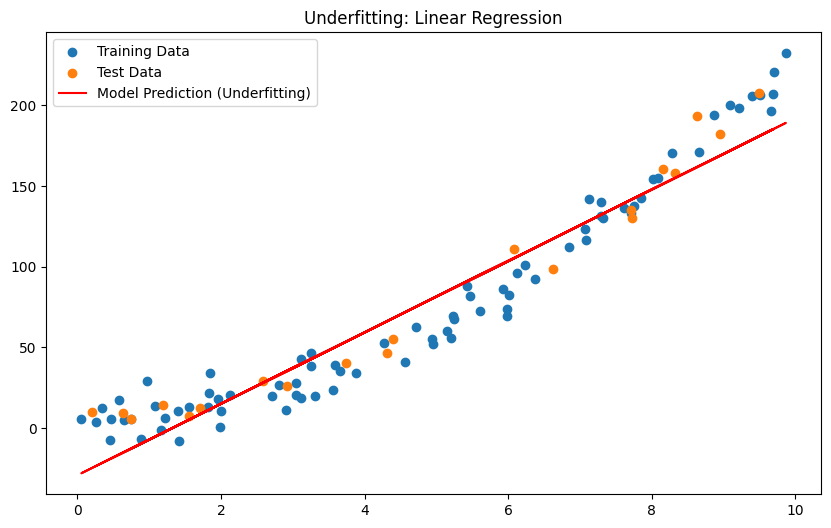

In [3]:
# Linear Regression (Underfitting)
model_underfit = LinearRegression()
model_underfit.fit(X_train, y_train)

# Predictions
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_train, y_train_pred_underfit, color='red', label='Model Prediction (Underfitting)')
plt.legend()
plt.title("Underfitting: Linear Regression")
plt.show()

# 4. Overfitting
Train a high-degree polynomial regression model (degree 15) to demonstrate overfitting.

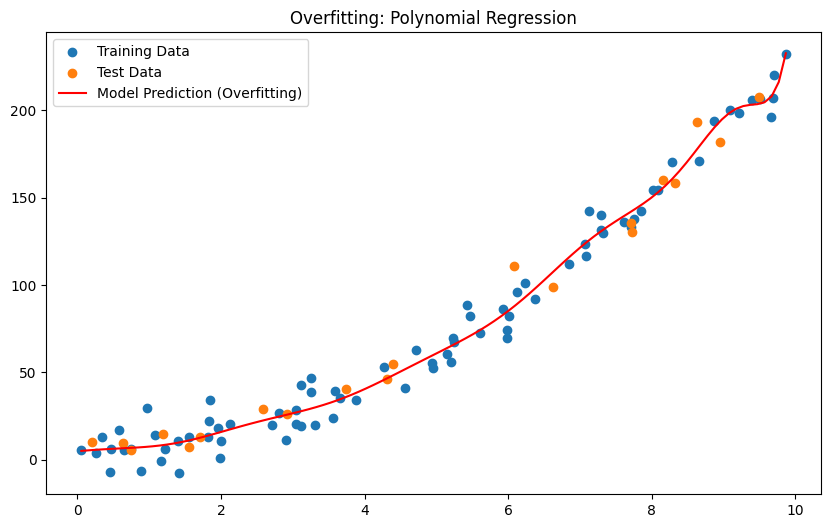

In [4]:
# Polynomial Regression (Overfitting)
poly_features = PolynomialFeatures(degree=15)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_overfit = LinearRegression()
model_overfit.fit(X_train_poly, y_train)

# Predictions
y_train_pred_overfit = model_overfit.predict(X_train_poly)
y_test_pred_overfit = model_overfit.predict(X_test_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
plt.plot(X_range, model_overfit.predict(X_range_poly), color='red', label='Model Prediction (Overfitting)')
plt.legend()
plt.title("Overfitting: Polynomial Regression")
plt.show()


# 5. Regularization
Apply Ridge and Lasso regularization to reduce overfitting.

c:\Users\Abdul Basit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.167e+03, tolerance: 3.610e+01
  model = cd_fast.enet_coordinate_descent(


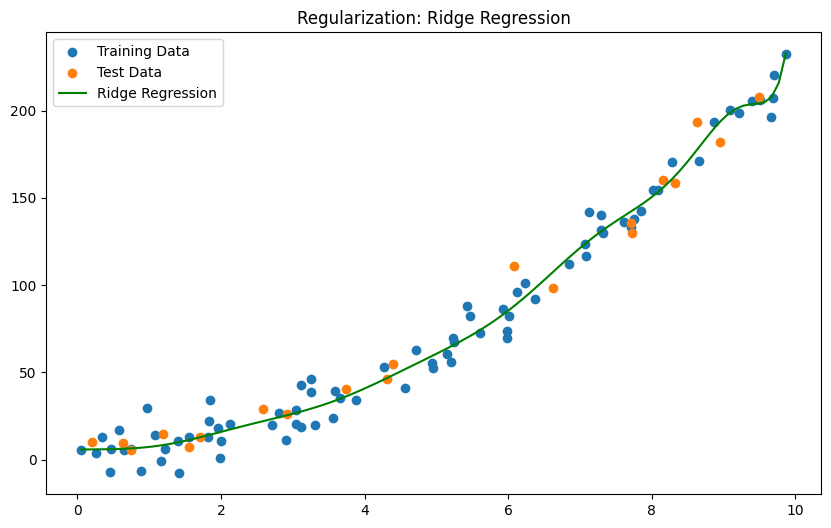

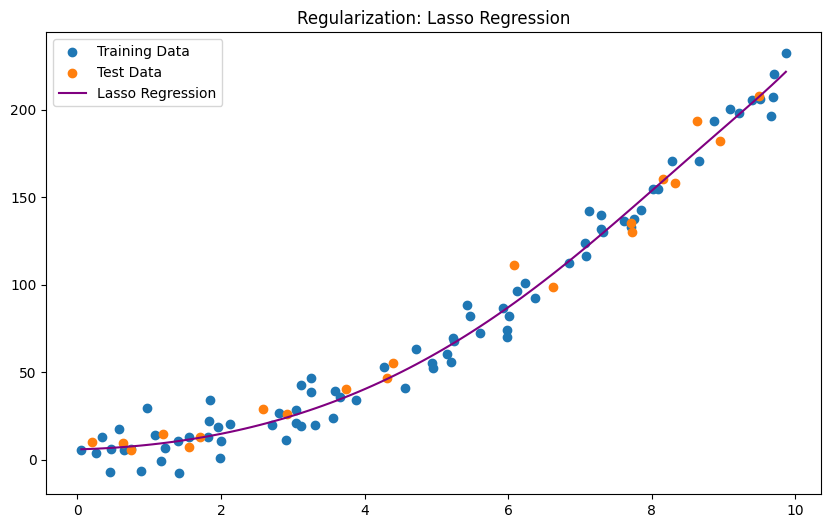

In [5]:
# Ridge Regression (L2 Regularization)
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_poly, y_train)

# Lasso Regression (L1 Regularization)
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train_poly, y_train)

# Predictions
y_train_pred_ridge = model_ridge.predict(X_train_poly)
y_test_pred_ridge = model_ridge.predict(X_test_poly)

y_train_pred_lasso = model_lasso.predict(X_train_poly)
y_test_pred_lasso = model_lasso.predict(X_test_poly)

# Plotting Ridge
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_range, model_ridge.predict(X_range_poly), color='green', label='Ridge Regression')
plt.legend()
plt.title("Regularization: Ridge Regression")
plt.show()

# Plotting Lasso
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_range, model_lasso.predict(X_range_poly), color='purple', label='Lasso Regression')
plt.legend()
plt.title("Regularization: Lasso Regression")
plt.show()


# 6. Conclusion
Summarize the importance of choosing the right model complexity and the role of regularization in improving generalization.